In [1]:
from openpiv import tools, process, validation, filters, scaling 
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import pandas as pd
from corrLib import readseq
from scipy.signal import medfilt2d
%matplotlib nbagg

## Tiffstack batch

In [2]:
# imgDir = r'R:\Dip\DF\PIV_analysis\1.tif'
# imgs = io.imread(imgDir)
# # set PIV parameters
# winsize = 50 # pixels
# searchsize = 100  # pixels, search in image B
# overlap = 25 # pixels
# dt = 0.02 # sec
# data = pd.DataFrame()
# for num, img in enumerate(imgs):
#     # read 2 adjacent images
#     if num % 2 == 0:
#         I0 = img
#         continue 
#     I1 = img
#     # run PIV function "extended_search_area_piv()"
#     u0, v0 = process.extended_search_area_piv(I0.astype(np.int32), I1.astype(np.int32), 
#                                                          window_size=winsize, overlap=overlap, dt=dt, 
#                                                          search_area_size=searchsize)
#     x, y = process.get_coordinates(image_size=I0.shape, window_size=winsize, overlap=overlap)    
    
#     u1 = medfilt2d(u0, kernel_size=3)
#     v1 = medfilt2d(v0, kernel_size=3)
#     u1[np.isnan(u1)]=0
#     v1[np.isnan(v1)]=0
#     u2 = medfilt2d(u1, kernel_size=3)
#     v2 = medfilt2d(v1, kernel_size=3)
#     frame_data = pd.DataFrame(data=np.array([x.flatten(), y.flatten(), u2.flatten(), v2.flatten()]).T,
#                    columns=['x', 'y', 'u', 'v']).assign(frame=num)
#     if num < 2:
#         data = frame_data
#     else:
#         data = data.append(frame_data)

## Image sequence batch

In [3]:
# folder = r'I:\Google Drive\Code\Python\PIV\test_images\imseq'
# fileList = readseq(folder)
# frame = 0
# data = pd.DataFrame()
# for num, i in fileList.iterrows():    
#     img = io.imread(i.Dir)
#     if frame % 2 == 0:
#         I0 = img
#         frame += 1
#         continue
#     I1 = img    
#     u0, v0 = process.extended_search_area_piv(I0.astype(np.int32), I1.astype(np.int32), 
#                                                          window_size=winsize, overlap=overlap, dt=dt, 
#                                                          search_area_size=searchsize)
#     x, y = process.get_coordinates(image_size=I0.shape, window_size=winsize, overlap=overlap)    
    
#     u1 = medfilt2d(u0, kernel_size=3)
#     v1 = medfilt2d(v0, kernel_size=3)
#     u1[np.isnan(u1)]=0
#     v1[np.isnan(v1)]=0
#     u2 = medfilt2d(u1, kernel_size=3)
#     v2 = medfilt2d(v1, kernel_size=3)
#     frame_data = pd.DataFrame(data=np.array([x.flatten(), y.flatten(), u2.flatten(), v2.flatten()]).T,
#                    columns=['x', 'y', 'u', 'v']).assign(frame=frame)
#     if num < 2:
#         data = frame_data
#     else:
#         data = data.append(frame_data)
#     frame += 1

## When using sig2noise method, the first velocity field matrices are full of nans. Always use the piv method without using sig2noise parameter, like below.

In [4]:
imgDir = r'E:\Github\Python\PIV\test_images\1.tif'
imgs = io.imread(imgDir)
# load images I0 and I1
for num, img in enumerate(imgs):
    if num == 2:
        break
    # read 2 adjacent images
    if num % 2 == 0:
        I0 = img
        continue    
    I1 = img

In [5]:
winsize = 50 # pixels
searchsize = 100  # pixels, search in image B
overlap = 25 # pixels
dt = 0.1 # sec
# apply piv function
u01, v01 = process.extended_search_area_piv(I0.astype(np.int32), I1.astype(np.int32), 
                                                         window_size=winsize, overlap=overlap, dt=dt, 
                                                         search_area_size=searchsize)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


In [6]:
# get coords
x, y = process.get_coordinates(image_size=I0.shape, window_size=winsize, overlap=overlap)

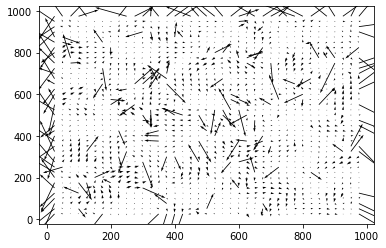

In [7]:
plt.quiver(x, y, u01, v01)

## Median filter with kernel_size=3 works well for smoothing the velocity field

In [8]:
# load matpiv data for the first frame pair
# mat = pd.read_csv(r'R:\Dip\DF\PIV_analysis\Analysis_1000\first_dataset.csv')
mat = pd.read_csv(r'E:\Google Drive\Research projects\DF\PIV\Analysis_1000\first_dataset.csv')
mat = mat.loc[mat.frame==1]
mat = mat.loc[(mat.x!=0)&(mat.y!=0)]

In [9]:
umat = np.array(mat.u).reshape(39, 39)
umat2 = medfilt2d(umat)
vmat = np.array(mat.v).reshape(39, 39)
vmat2 = medfilt2d(vmat)

## Comparison with matpiv result show good agreement
* Black: python-openpiv
* Red: matlab-matpiv

(-22.5, 1022.5, -22.5, 1022.5)

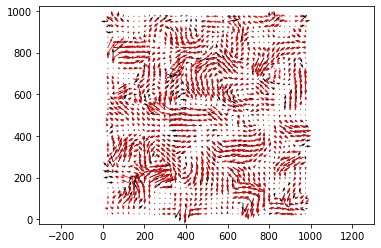

In [10]:
# remove nan values
u01[np.isnan(u01)]=0
v01[np.isnan(v01)]=0
# median filter
u02 = medfilt2d(u01, kernel_size=3)
v02 = medfilt2d(v01, kernel_size=3)
plt.quiver(x, y, u02, v02)
plt.quiver(mat.x, 1000-mat.y, umat2, -vmat2, color='red') 
# 1000-mat.y is because openpiv and matpiv index image differently
plt.axis('equal')

In [11]:
# load openpiv(python) data for the first frame pair
pyt = pd.DataFrame(data=np.array([x.flatten(), y.flatten(), u02.flatten(), v02.flatten()]).T,
                   columns=['x', 'y', 'u', 'v'])
pyt = pyt.reset_index()
# pyt = pyt.sort_values(by=['x', 'y'])

## Quantify this difference
D = sum\[(v1-v2)^2\]/sum\[v1^2\]

In [12]:
mat2 = mat.sort_values(by=['y', 'x'], ascending=[False, True])
# convert to 2d array and apply median filter
umat = np.array(mat2.u).reshape(39, 39)
umat2 = medfilt2d(umat)
vmat = np.array(mat2.v).reshape(39, 39)
vmat2 = medfilt2d(vmat)
# convert back and replace original columns
mat2.u = umat2.flatten()
mat2.v = vmat2.flatten()
# convert mat.y to python coords
mat2.y = 1000 - mat2.y
mat2.v = -mat2.v
mat2 = mat2.sort_values(by=['y', 'x'], ascending=[False, True]).reset_index()

In [13]:
D = ((mat2.u-pyt.u)**2 + (mat2.v-pyt.v)**2) / (pyt.u**2 + pyt.v**2)

In [14]:
Di = ((mat2.u-pyt.u)**2 + (mat2.v-pyt.v)**2).sum() / (pyt.u**2 + pyt.v**2).sum()

In [15]:
D.loc[D<1].mean()

0.33313837085284975

<IPython.core.display.Javascript object>


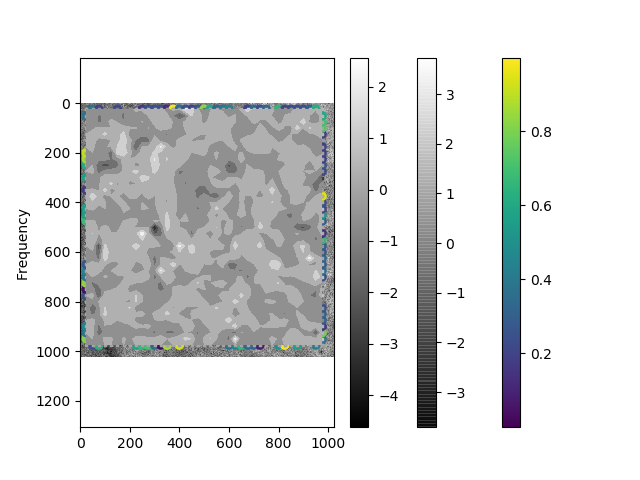

(-22.5, 1022.5, -22.5, 1022.5)

In [16]:
%matplotlib nbagg
plt.quiver(pyt.x, pyt.y, pyt.u, pyt.v)
plt.quiver(mat2.x, mat2.y, mat2.u, mat2.v, color='red') 
plt.axis('equal')

In [17]:
# difference matrix, color indicates difference
plt.scatter(pyt.x.loc[D<1], pyt.y.loc[D<1], c=D.loc[D<1])
plt.colorbar()

In [18]:
# difference histogram
D.loc[D<5].plot.hist()

## Velocity field analysis - divergence and vorticity

In [19]:
# Create vector field x, y, u, v from PIV analysis
u = np.array(pyt.u).reshape(39, 39)
v = np.array(pyt.v).reshape(39, 39)

### div(**v**)(i, j) = (u(i, j) - u(i-1, j))/l + (v(i, j) - v(i, j-1))/l 
### curl(**v**)(i, j) = (v(i, j) - v(i-1, j))/l + (u(i, j) - u(i, j-1))/l
Since both contain i-1, j-1 terms, the matrix of div and curl should be 1 row and 1 col smaller than the original vector field. I will pad the matrix with a row and a col at top and left, filled with zeros, to keep the outcome the same shape as the input.


In [20]:
divmat = np.zeros(x.shape)
l = x[0, 1] - x[0, 0]
for i in range(1, divmat.shape[0]):
    for j in range(1, divmat.shape[1]):
        divmat[i, j] = (u[i, j] - u[i-1, j])/l + (v[i, j] - v[i, j-1])/l

### plot divergence field on top of original image

In [21]:
plt.imshow(I0, cmap='gray')
plt.scatter(x, y, c=divmat, s=2, marker='s', cmap='gray', alpha=0.8)
plt.colorbar()

In [22]:
plt.imshow(I0, cmap='gray')
cs = plt.contourf(x, y, divmat, alpha=1, cmap='gray')

### plot vorticity field on top of original image

In [23]:
curlmat = np.zeros(x.shape)
l = x[0, 1] - x[0, 0]
for i in range(1, divmat.shape[0]):
    for j in range(1, divmat.shape[1]):
        curlmat[i, j] = (v[i, j] - v[i-1, j])/l - (u[i, j] - u[i, j-1])/l

In [24]:
plt.imshow(I0, cmap='gray')
plt.scatter(x, y, c=curlmat, s=2, marker='s', cmap='gray', alpha=1)
plt.colorbar()

In [25]:
plt.imshow(I0, cmap='gray')
cs = plt.contourf(x, y, curlmat, alpha=1, cmap='gray')

## Correlations between intensity and div/curl
* Use intensity field of the first image of each pair

In [26]:
from corrLib import divide_windows

In [33]:
X, Y, I = divide_windows(I0, windowsize=[50, 50], step=25)

In [35]:
I.shape

(39, 39)

In [36]:
divmat.shape

(39, 39)

In [49]:
Inorm = (2*I - I.max() - I.min()) / (I.max() - I.min())

In [56]:
dnorm = (2*divmat - divmat.max() - divmat.min()) / (divmat.max() - divmat.min())

In [57]:
dnorm.max()

1.0

<IPython.core.display.Javascript object>


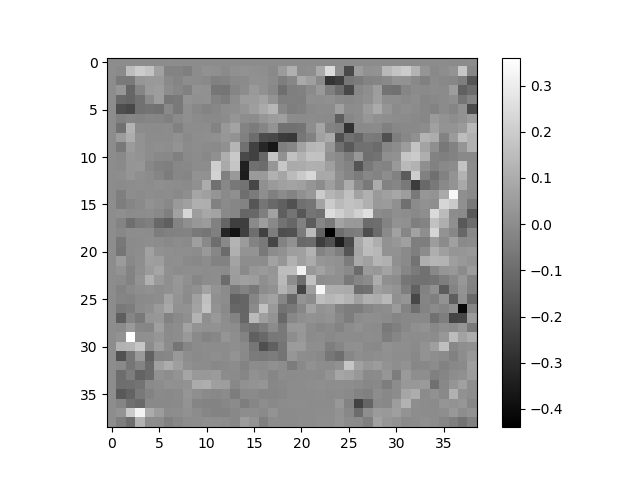

In [60]:
# Compute correlation between the two matrices
plt.imshow(Inorm*dnorm, cmap='gray')
plt.colorbar()

<IPython.core.display.Javascript object>


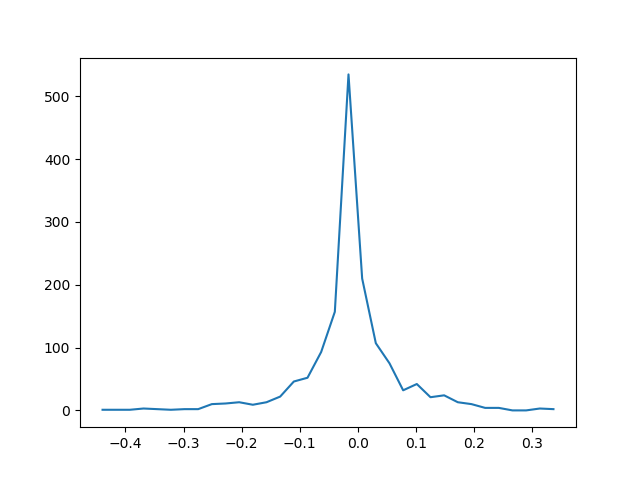

In [63]:
hist, bins = np.histogram(Inorm*dnorm, bins='scott')
plt.plot(bins[:-1], hist)

In [64]:
from pivLib import tiffstackPIV

In [65]:
winsize = 50
searchsize = 100
overlap = 25
dt = 0.1

In [66]:
imgDir = r'E:\Google Drive\Research projects\DF\PIV\1.tif'
data = tiffstackPIV(imgDir, winsize, searchsize, overlap, dt)
data.to_csv(r'E:\Google Drive\Research projects\DF\PIV\pyPIVdata.csv', index=False)

E:\Github\Python\PIV\src\pivLib.py:22: RuntimeWarning: invalid value encountered in double_scalars
  search_area_size=searchsize)


In [74]:
def div(x, y, u, v):
    divmat = np.zeros(x.shape)
    l = x[0, 1] - x[0, 0]
    for i in range(1, divmat.shape[0]):
        for j in range(1, divmat.shape[1]):
            divmat[i, j] = (u[i, j] - u[i-1, j])/l + (v[i, j] - v[i, j-1])/l
    return divmat

In [75]:
def curl(x, y, u, v):
    curlmat = np.zeros(x.shape)
    l = x[0, 1] - x[0, 0]
    for i in range(1, divmat.shape[0]):
        for j in range(1, divmat.shape[1]):
            curlmat[i, j] = (v[i, j] - v[i-1, j])/l - (u[i, j] - u[i, j-1])/l
    return curlmat

In [69]:
imgs = io.imread(imgDir)

In [72]:
x = np.array(data.x.loc[data.frame==1])
x = x.reshape(39, 39)

In [73]:
x

array([[ 25.,  50.,  75., ..., 925., 950., 975.],
       [ 25.,  50.,  75., ..., 925., 950., 975.],
       [ 25.,  50.,  75., ..., 925., 950., 975.],
       ...,
       [ 25.,  50.,  75., ..., 925., 950., 975.],
       [ 25.,  50.,  75., ..., 925., 950., 975.],
       [ 25.,  50.,  75., ..., 925., 950., 975.]])

In [89]:
vf_data = pd.DataFrame()
count = 0
for frame in data.frame.drop_duplicates():
    X, Y, I = divide_windows(I0, windowsize=[50, 50], step=25)
    I0 = imgs[frame-1]
    subdata = data.loc[data.frame==frame]
    x = np.array(subdata.x).reshape(X.shape)
    y = np.array(subdata.y).reshape(X.shape)
    u = np.array(subdata.u).reshape(X.shape)
    v = np.array(subdata.v).reshape(X.shape)
    d = div(x, y, u, v)
    c = curl(x, y, u, v)
    Inorm = (2*I - I.max() - I.min()) / (I.max() - I.min())
    dnorm = (2*d - d.max() - d.min()) / (d.max() - d.min())
    cnorm = (2*c - c.max() - c.min()) / (c.max() - c.min())
    Id = Inorm * dnorm
    Ic = Inorm * cnorm
    subdata = subdata.assign(I=I.flatten(), div=d.flatten(), curl=c.flatten(), Ixdiv=Id.flatten(), Ixcurl=Ic.flatten())
    if count == 0:
        vf_data = subdata
    else:
        vf_data = vf_data.append(subdata)
    count += 1

<IPython.core.display.Javascript object>


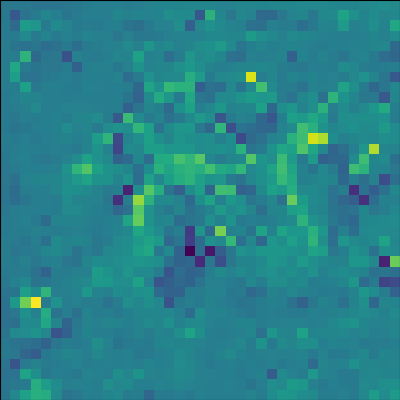

In [103]:
subdata = vf_data.loc[vf_data.frame==1]
x = np.array(subdata.x).reshape(39, 39)
y = np.array(subdata.y).reshape(39, 39)
Id = np.array(subdata.Ixdiv).reshape(39, 39)
Ic = np.array(subdata.Ixcurl).reshape(39, 39)
fig = plt.figure(figsize=(4, 4))
ax = fig.add_axes([0,0,1,1])
ax.imshow(Ic)

In [116]:
from IPython.display import clear_output
import os

In [119]:
vf_data

,x,y,u,v,frame,I,div,curl,Ixdiv,Ixcurl
0,25.0,975.0,0.000000,0.000000,1,151.780000,0.000000,0.000000,-0.033776,-0.028666
1,50.0,975.0,0.000000,0.000000,1,152.308000,0.000000,0.000000,-0.032245,-0.027367
2,75.0,975.0,0.000000,23.368911,1,152.397200,0.000000,0.000000,-0.031986,-0.027148
3,100.0,975.0,0.000000,11.554794,1,146.339200,0.000000,0.000000,-0.049549,-0.042053
4,125.0,975.0,0.000000,0.000000,1,145.001200,0.000000,0.000000,-0.053428,-0.045346
5,150.0,975.0,0.000000,0.000000,1,147.706400,0.000000,0.000000,-0.045585,-0.038689
6,175.0,975.0,0.000000,0.000000,1,149.985200,0.000000,0.000000,-0.038979,-0.033082
7,200.0,975.0,0.000000,7.552109,1,153.749600,0.000000,0.000000,-0.028066,-0.023820
8,225.0,975.0,0.000000,10.066147,1,159.023200,0.000000,0.000000,-0.012777,-0.010844
9,250.0,975.0,0.000000,10.066147,1,162.380800,0.000000,0.000000,-0.003043,-0.002583


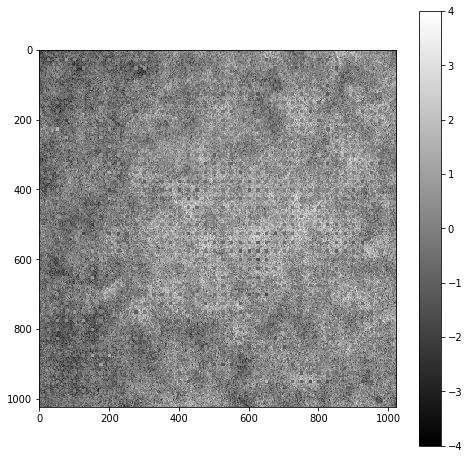

In [128]:
# save div, curl images
folder = r'E:\Github\Python\PIV\test_images\Velocity_field_analysis\curl'
%matplotlib inline
for frame in data.frame.drop_duplicates():
    subdata = vf_data.loc[vf_data.frame==frame]
    x = np.array(subdata.x).reshape(39, 39)
    y = np.array(subdata.y).reshape(39, 39)
    d = np.array(subdata['div']).reshape(39, 39)
    c = np.array(subdata.curl).reshape(39, 39)
    plt.figure(figsize=(8, 8))
    plt.imshow(imgs[frame-1], cmap='gray')
    plt.scatter(x, y, c=c, s=5, marker='s', cmap='gray', vmin=-4, vmax=4)
    plt.colorbar()
    plt.savefig(os.path.join(folder, '{:04d}.png'.format(frame)))
    plt.pause(.1)
    clear_output(wait=True)

In [122]:
subdata.div

<bound method _arith_method_FRAME.<locals>.f of           x      y          u          v  frame           I       div  \
0      25.0  975.0   0.000000   0.000000      1  151.780000  0.000000   
1      50.0  975.0   0.000000   0.000000      1  152.308000  0.000000   
2      75.0  975.0   0.000000  23.368911      1  152.397200  0.000000   
3     100.0  975.0   0.000000  11.554794      1  146.339200  0.000000   
4     125.0  975.0   0.000000   0.000000      1  145.001200  0.000000   
5     150.0  975.0   0.000000   0.000000      1  147.706400  0.000000   
6     175.0  975.0   0.000000   0.000000      1  149.985200  0.000000   
7     200.0  975.0   0.000000   7.552109      1  153.749600  0.000000   
8     225.0  975.0   0.000000  10.066147      1  159.023200  0.000000   
9     250.0  975.0   0.000000  10.066147      1  162.380800  0.000000   
10    275.0  975.0   4.304962  10.066147      1  163.317200  0.000000   
11    300.0  975.0   7.984543   0.000000      1  163.412400  0.000000   
12 

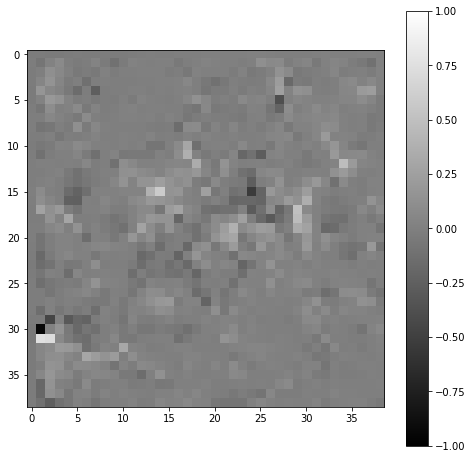

In [118]:
# save Ixdiv, Ixcurl images
folder = r'E:\Github\Python\PIV\test_images\Velocity_field_analysis\Ixcurl'
%matplotlib inline
for frame in data.frame.drop_duplicates():
    subdata = vf_data.loc[vf_data.frame==frame]
    x = np.array(subdata.x).reshape(39, 39)
    y = np.array(subdata.y).reshape(39, 39)
    Id = np.array(subdata.Ixdiv).reshape(39, 39)
    Ic = np.array(subdata.Ixcurl).reshape(39, 39)
    plt.figure(figsize=(8, 8))
    plt.imshow(Ic, cmap='gray', vmin=-1, vmax=1)
    plt.colorbar()
    plt.savefig(os.path.join(folder, '{:04d}.png'.format(frame)))
    plt.pause(.1)
    clear_output(wait=True)

In [86]:
self.ax = self.fig.add_axes([0,0,1,1])

array([[1, 6],
       [4, 1]])